# Fourth Data Preparation Process

In this notebook file, the quality of the dataset will be analyzed and necessary improvements will be made.

Normally this improvements should be done as first step in the data preparation process.

However in this project, performance differences will be observed between models that trained with differently prepared data.

In this way, the importance of different data preparation processes will be highlighted.

Resized data will be read from pkl file.

Training, Validation and Test DataFrames will be concatenated.

Analyzes will be performed on the concatenated DataFrame, and necessary improvements will be applied for each DataFrame separately.

Since FullPhoto and FaceOnly datasets are the same in terms of splitting and ordering, the analysis will be performed on a single dataset and the improvements will be applied to both datasets in the same way.

Improved DataFrames will be saved as md5 files for future use after being checked.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, personDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(personDf.iloc[imgDf.iloc[i].PersonID].Name)
    
    plt.show()
    
    return

In [4]:
#Resized person data is being read from md5 file
personDf = pd.read_pickle("../Data/ResizedData/Person.pkl")
personDf

,Name
ID,
0,Abdullah Gul
1,Adrien Brody
2,Ahmed Chalabi
3,Ai Sugiyama
4,Alan Greenspan
...,...
418,Yasser Arafat
419,Yoko Ono
420,Yoriko Kawaguchi


In [5]:
#FullPhoto training data is being read from md5 file
trainingDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Training.pkl")
trainingDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,125,"[[[29, 43, 55], [29, 43, 55], [28, 42, 54], [2..."
2,356,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
3,277,"[[[37, 32, 29], [37, 32, 31], [38, 33, 32], [3..."
4,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
4151,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4152,120,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4153,322,"[[[193, 202, 211], [193, 202, 211], [193, 205,..."
4154,383,"[[[10, 13, 51], [10, 13, 51], [11, 13, 53], [1..."


In [6]:
#FullPhoto validation data is being read from md5 file
validationDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Validation.pkl")
validationDf

,PersonID,ImageBGR
0,171,"[[[28, 8, 3], [28, 8, 3], [28, 8, 3], [28, 8, ..."
1,120,"[[[13, 20, 15], [13, 20, 15], [13, 20, 15], [1..."
2,196,"[[[60, 67, 60], [60, 67, 60], [60, 67, 60], [5..."
3,95,"[[[94, 131, 175], [98, 135, 179], [99, 136, 18..."
4,380,"[[[84, 37, 15], [83, 36, 14], [83, 36, 14], [8..."
...,...,...
909,71,"[[[2, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], ..."
910,183,"[[[58, 34, 22], [52, 28, 18], [44, 22, 11], [4..."
911,120,"[[[4, 0, 0], [2, 0, 0], [2, 0, 0], [1, 0, 0], ..."
912,120,"[[[27, 51, 71], [26, 50, 70], [26, 50, 68], [2..."


In [7]:
#FullPhoto test data is being read from md5 file
testDf = pd.read_pickle("../Data/ResizedData/FullPhoto/Test.pkl")
testDf

,PersonID,ImageBGR
0,270,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
1,80,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,14,"[[[100, 142, 119], [100, 142, 119], [100, 142,..."
3,120,"[[[166, 148, 131], [167, 146, 129], [159, 136,..."
4,401,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
...,...,...
910,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
911,302,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
912,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
913,340,"[[[9, 32, 77], [9, 32, 77], [9, 32, 77], [10, ..."


In [8]:
#Training, Validation and Test data are being concatenated
concatDf = pd.concat([trainingDf, validationDf, testDf])
concatDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,125,"[[[29, 43, 55], [29, 43, 55], [28, 42, 54], [2..."
2,356,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
3,277,"[[[37, 32, 29], [37, 32, 31], [38, 33, 32], [3..."
4,131,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
910,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
911,302,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
912,401,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
913,340,"[[[9, 32, 77], [9, 32, 77], [9, 32, 77], [10, ..."


In [9]:
#A new DataFrame to keep number of images belonging to each person is being created and sorted by Number of Images
#Statistical work will be done on this dataframe
totalDf = pd.DataFrame(concatDf.groupby(['PersonID']).size(), columns = ['Images']).sort_values(by = ['Images', 'PersonID'])
del concatDf
totalDf

,Images
PersonID,
2,5
3,5
4,5
5,5
9,5
...,...
121,109
95,121
391,144


In [10]:
#Statistical data of totalDf is being displayed with a function of the pandas library
#The parts between the min and max values are called quartiles
#See https://en.wikipedia.org/wiki/Quartile for details
totalDf.describe()

,Images
count,423.000000
mean,14.148936
std,30.797828
min,5.000000
25%,5.000000
50%,8.000000
75%,13.500000
max,530.000000


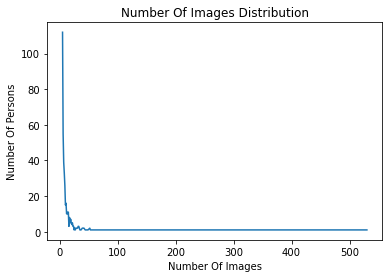

In [11]:
#The distribution of people is being plotted according to the number of images belong to them
forChart = totalDf.groupby(['Images']).size()
plt.plot(forChart.index,forChart.values)
del forChart
plt.title("Number Of Images Distribution")
plt.xlabel("Number Of Images")
plt.ylabel("Number Of Persons")
plt.show()

In [12]:
#By looking at the distribution plot and the quartiles, 
#It can be said that the number of images that belongs the people is spread over a very large range

#The face recognition model to be used in this project can simply be defined as a image classification model
#As determined in the first preparation step, 
#the people who represented by the least image of the selected people represent by 5 images
#On the other hand, the person who represented by the most images represents by 530 images
#In such cases, it can be said that the predictions of the classification model tend to shift to the most represented classes
#Such datasets are called Imbalanced datasets

#Some methods have been developed to deal with this problem
#However, in this notebook file, it will be continued by using balanced parts of the available data
#It would be appropriate to use people represented by a close number of images,
#and people represented by a large number of images.
#Parts that meet these two conditions as much as possible will be used

#Looking at the quartiles, the people represented by number of images below the first quartile(Q1) 
#are represented by the same number of images
#This means that if First Quarter of dateset is selected the dataset will be perfectly balanced
#But the number of 5 sample per class is too small for such a classification problem
#When each person represented by 5 images is selected using initiative
#More classes will be obtained than a quarter of the number of classes in the data set
#With too few images on hand there will be too many classes waiting to be classified
#This will be challenging

#All persons represented by 5 images are being taken
selectedPersonDf = totalDf[totalDf['Images'] == 5]
selectedPersonDf

,Images
PersonID,
2,5
3,5
4,5
5,5
9,5
...,...
407,5
411,5
413,5


In [13]:
#Normally the First Quarter should contain exactly 1/4 of the people in the dataset
#But in this case the number of people with the same number of images is more than 1/4 of the whole dataset
#Although it is being named as such, the selected data does not fully meet the definition of First Quarter

#First Quarter person dataframe being created based on selectedPersonDf and its index is being renamed as OldID
firstQuarterPersonDf = personDf[personDf.index.isin(selectedPersonDf.index.values)]
firstQuarterPersonDf.index.rename('OldID', inplace = True)
firstQuarterPersonDf

,Name
OldID,
2,Ahmed Chalabi
3,Ai Sugiyama
4,Alan Greenspan
5,Alastair Campbell
9,Allyson Felix
...,...
407,Wayne Ferreira
411,William Macy
413,Woody Allen


In [14]:
#New indexes are being appended to firstQuarterPersonDf and index of firstQuarterPersonDf is being renamed as ID
firstQuarterPersonDf.reset_index(inplace = True)
firstQuarterPersonDf.index.rename('ID', inplace = True)
firstQuarterPersonDf

,OldID,Name
ID,,
0,2,Ahmed Chalabi
1,3,Ai Sugiyama
2,4,Alan Greenspan
3,5,Alastair Campbell
4,9,Allyson Felix
...,...,...
107,407,Wayne Ferreira
108,411,William Macy
109,413,Woody Allen


In [15]:
#Being looked at quartiles again to select another dataset
#Second Quartile(Q2) is the median of dataset which is 8
#If Second Quarter(Between Q1-Q2) is desired to be selected, another data set containing 1/4 of all data will be selected
#however, there will not be a big difference in quality between the dataset in which each person is represented by 5 images 
#and the dataset in which each person is represented by images in the range of [6, 8]

#Since the Fourth Quarter(Above Q3) is so widely spread([14-530]), it's not even an option

#Focusing on Third Quarter(Between Q2-Q3)
#When each person represented by between [10, 13.5) images is selected using initiative
#Less classes will be obtained than a quarter of the number of classes in the data set
#In this way, the training process will be done with a relatively small number of classes 
#with a relatively large number of images


#All persons represented by [10, 13.5) images are being taken
selectedPersonDf = totalDf[(totalDf['Images'] > 9) & (totalDf['Images'] < 13.5)]
selectedPersonDf

,Images
PersonID,
43,10
150,10
155,10
161,10
162,10
164,10
278,10
281,10
299,10


In [16]:
#Normally the Third Quarter should contain exactly 1/4 of the people in the dataset
#But since selected minimum number of images is 10 instead of 8(Q2) it will be less than 1/4 of the whole dataset
#That is, although it is being named as such, the selected data does not fully meet the definition of Third Quarter

#Third Quarter person dataframe being created based on selectedPersonDf and its index is being renamed as OldID
thirdQuarterPersonDf = personDf[personDf.index.isin(selectedPersonDf.index.values)]
thirdQuarterPersonDf.index.rename('OldID', inplace = True)
thirdQuarterPersonDf

,Name
OldID,
1,Adrien Brody
22,Anna Kournikova
23,Ann Veneman
27,Ari Fleischer
43,Bill McBride
61,Catherine Zeta-Jones
65,Charles Moose
80,Condoleezza Rice
96,Edmund Stoiber


In [17]:
#New indexes are being appended to thirdQuarterPersonDf and index of thirdQuarterPersonDf is being renamed as ID
thirdQuarterPersonDf.reset_index(inplace = True)
thirdQuarterPersonDf.index.rename('ID', inplace = True)
thirdQuarterPersonDf

,OldID,Name
ID,,
0,1,Adrien Brody
1,22,Anna Kournikova
2,23,Ann Veneman
3,27,Ari Fleischer
4,43,Bill McBride
5,61,Catherine Zeta-Jones
6,65,Charles Moose
7,80,Condoleezza Rice
8,96,Edmund Stoiber


In [18]:
#A new training dataframe is being created by getting the images of people whose 
#in firstQuarterPersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newTrainingDf.reset_index(drop = True, inplace = True)
newTrainingDf

,PersonID,ImageBGR
0,356,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
1,247,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,354,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,34,"[[[158, 177, 174], [158, 177, 174], [158, 177,..."
4,381,"[[[43, 17, 77], [45, 21, 78], [43, 20, 72], [4..."
...,...,...
443,223,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
444,292,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
445,221,"[[[7, 0, 0], [7, 0, 0], [7, 0, 0], [7, 0, 0], ..."
446,91,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [2, 0, 0], ..."


In [19]:
#PersonID column in newTrainingDf is being replaced with ID column in firstQuarterPersonDf
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR
0,95,"[[[59, 59, 53], [58, 58, 52], [57, 56, 51], [5..."
1,63,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,94,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,10,"[[[158, 177, 174], [158, 177, 174], [158, 177,..."
4,101,"[[[43, 17, 77], [45, 21, 78], [43, 20, 72], [4..."
...,...,...
443,55,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
444,79,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
445,54,"[[[7, 0, 0], [7, 0, 0], [7, 0, 0], [7, 0, 0], ..."
446,29,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [2, 0, 0], ..."


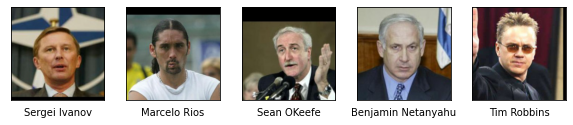

In [20]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), firstQuarterPersonDf)

In [21]:
#A new validation dataframe is being created by getting the images of people
#whose in firstQuarterPersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newValidationDf.reset_index(drop = True, inplace = True)
newValidationDf

,PersonID,ImageBGR
0,196,"[[[60, 67, 60], [60, 67, 60], [60, 67, 60], [5..."
1,271,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,118,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
3,85,"[[[0, 1, 2], [0, 0, 0], [1, 1, 0], [2, 1, 0], ..."
4,68,"[[[58, 109, 149], [58, 109, 149], [58, 109, 14..."
5,282,"[[[0, 0, 3], [0, 0, 2], [0, 0, 1], [0, 0, 1], ..."
6,298,"[[[0, 1, 3], [0, 0, 3], [1, 0, 4], [4, 0, 5], ..."
7,224,"[[[251, 255, 255], [251, 255, 255], [251, 255,..."
8,415,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9,256,"[[[10, 16, 15], [9, 15, 14], [8, 12, 12], [9, ..."


In [22]:
#PersonID column in newValidationDf is being replaced with ID column in firstQuarterPersonDf
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR
0,50,"[[[60, 67, 60], [60, 67, 60], [60, 67, 60], [5..."
1,73,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,40,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
3,27,"[[[0, 1, 2], [0, 0, 0], [1, 1, 0], [2, 1, 0], ..."
4,18,"[[[58, 109, 149], [58, 109, 149], [58, 109, 14..."
5,75,"[[[0, 0, 3], [0, 0, 2], [0, 0, 1], [0, 0, 1], ..."
6,81,"[[[0, 1, 3], [0, 0, 3], [1, 0, 4], [4, 0, 5], ..."
7,56,"[[[251, 255, 255], [251, 255, 255], [251, 255,..."
8,111,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9,68,"[[[10, 16, 15], [9, 15, 14], [8, 12, 12], [9, ..."


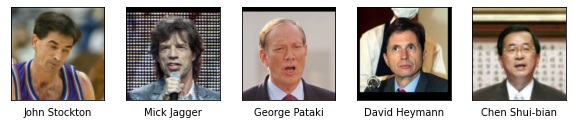

In [23]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), firstQuarterPersonDf)

In [24]:
#A new test dataframe is being created by getting the images of people 
#whose in firstQuarterPersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newTestDf.reset_index(drop = True, inplace = True)
newTestDf

,PersonID,ImageBGR
0,270,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
1,111,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
2,72,"[[[76, 11, 3], [76, 11, 3], [77, 11, 3], [78, ..."
3,398,"[[[150, 165, 251], [148, 164, 247], [150, 164,..."
4,252,"[[[48, 69, 77], [49, 70, 78], [49, 68, 76], [4..."
5,333,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,365,"[[[169, 168, 172], [168, 167, 171], [168, 167,..."
7,317,"[[[82, 82, 96], [82, 82, 95], [83, 81, 93], [8..."
8,400,"[[[0, 5, 74], [0, 6, 72], [1, 6, 71], [2, 6, 7..."
9,255,"[[[0, 2, 0], [0, 2, 0], [0, 2, 0], [0, 2, 0], ..."


In [25]:
#PersonID column in newTestDf is being replaced with ID column in firstQuarterPersonDf 
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR
0,72,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
1,37,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
2,21,"[[[76, 11, 3], [76, 11, 3], [77, 11, 3], [78, ..."
3,104,"[[[150, 165, 251], [148, 164, 247], [150, 164,..."
4,65,"[[[48, 69, 77], [49, 70, 78], [49, 68, 76], [4..."
5,88,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,97,"[[[169, 168, 172], [168, 167, 171], [168, 167,..."
7,87,"[[[82, 82, 96], [82, 82, 95], [83, 81, 93], [8..."
8,105,"[[[0, 5, 74], [0, 6, 72], [1, 6, 71], [2, 6, 7..."
9,67,"[[[0, 2, 0], [0, 2, 0], [0, 2, 0], [0, 2, 0], ..."


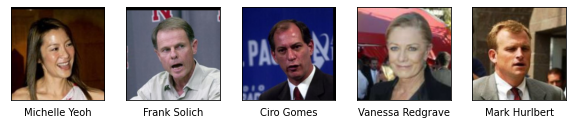

In [26]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), firstQuarterPersonDf)

In [27]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/FirstQuarter/FullPhoto/Training.pkl")
newValidationDf.to_pickle("../Data/FirstQuarter/FullPhoto/Validation.pkl")
newTestDf.to_pickle("../Data/FirstQuarter/FullPhoto/Test.pkl")

In [28]:
#A new training dataframe is being created by getting the images of people whose 
#in thirdQuarterPersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newTrainingDf.reset_index(drop = True, inplace = True)
newTrainingDf

,PersonID,ImageBGR
0,22,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,161,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
2,306,"[[[79, 81, 89], [78, 81, 89], [78, 80, 88], [7..."
3,406,"[[[31, 37, 36], [36, 44, 43], [39, 50, 50], [3..."
4,386,"[[[89, 124, 150], [87, 122, 148], [84, 119, 14..."
...,...,...
407,326,"[[[52, 78, 108], [53, 79, 109], [56, 80, 109],..."
408,27,"[[[227, 242, 238], [240, 253, 247], [247, 254,..."
409,281,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
410,150,"[[[21, 39, 38], [24, 42, 41], [27, 45, 46], [2..."


In [29]:
#PersonID column in newTrainingDf is being replaced with ID column in thirdQuarterPersonDf
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR
0,1,"[[[42, 19, 17], [42, 19, 17], [42, 19, 17], [4..."
1,18,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ..."
2,38,"[[[79, 81, 89], [78, 81, 89], [78, 80, 88], [7..."
3,50,"[[[31, 37, 36], [36, 44, 43], [39, 50, 50], [3..."
4,48,"[[[89, 124, 150], [87, 122, 148], [84, 119, 14..."
...,...,...
407,41,"[[[52, 78, 108], [53, 79, 109], [56, 80, 109],..."
408,3,"[[[227, 242, 238], [240, 253, 247], [247, 254,..."
409,34,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
410,14,"[[[21, 39, 38], [24, 42, 41], [27, 45, 46], [2..."


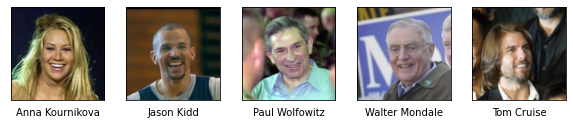

In [30]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), thirdQuarterPersonDf)

In [31]:
#A new validation dataframe is being created by getting the images of people
#whose in thirdQuarterPersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newValidationDf.reset_index(drop = True, inplace = True)
newValidationDf

,PersonID,ImageBGR
0,275,"[[[62, 98, 86], [62, 98, 86], [62, 98, 86], [6..."
1,146,"[[[37, 11, 7], [37, 11, 7], [37, 11, 7], [37, ..."
2,164,"[[[4, 2, 2], [3, 1, 1], [1, 0, 0], [0, 0, 0], ..."
3,299,"[[[94, 42, 6], [89, 40, 4], [80, 35, 2], [70, ..."
4,326,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
...,...,...
91,220,"[[[0, 2, 0], [0, 1, 0], [2, 1, 0], [4, 1, 0], ..."
92,65,"[[[48, 84, 68], [47, 83, 67], [47, 82, 68], [4..."
93,116,"[[[22, 27, 36], [20, 24, 33], [17, 22, 31], [1..."
94,315,"[[[0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], ..."


In [32]:
#PersonID column in newValidationDf is being replaced with ID column in thirdQuarterPersonDf
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR
0,32,"[[[62, 98, 86], [62, 98, 86], [62, 98, 86], [6..."
1,13,"[[[37, 11, 7], [37, 11, 7], [37, 11, 7], [37, ..."
2,20,"[[[4, 2, 2], [3, 1, 1], [1, 0, 0], [0, 0, 0], ..."
3,36,"[[[94, 42, 6], [89, 40, 4], [80, 35, 2], [70, ..."
4,41,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
...,...,...
91,28,"[[[0, 2, 0], [0, 1, 0], [2, 1, 0], [4, 1, 0], ..."
92,6,"[[[48, 84, 68], [47, 83, 67], [47, 82, 68], [4..."
93,9,"[[[22, 27, 36], [20, 24, 33], [17, 22, 31], [1..."
94,39,"[[[0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], ..."


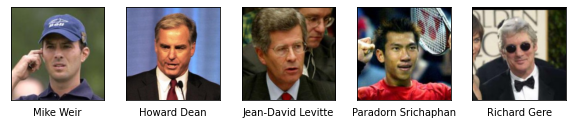

In [33]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), thirdQuarterPersonDf)

In [34]:
#A new test dataframe is being created by getting the images of people 
#whose in thirdQuarterPersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newTestDf.reset_index(drop = True, inplace = True)
newTestDf

,PersonID,ImageBGR
0,80,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,162,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,22,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,406,"[[[15, 13, 13], [15, 13, 13], [14, 12, 12], [1..."
4,116,"[[[44, 77, 63], [44, 77, 63], [44, 77, 63], [4..."
...,...,...
76,215,"[[[0, 1, 0], [1, 2, 0], [1, 2, 0], [3, 1, 0], ..."
77,237,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
78,278,"[[[15, 7, 8], [15, 7, 8], [15, 6, 8], [15, 4, ..."
79,291,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."


In [35]:
#PersonID column in newTestDf is being replaced with ID column in thirdQuarterPersonDf 
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR
0,7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,19,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,50,"[[[15, 13, 13], [15, 13, 13], [14, 12, 12], [1..."
4,9,"[[[44, 77, 63], [44, 77, 63], [44, 77, 63], [4..."
...,...,...
76,27,"[[[0, 1, 0], [1, 2, 0], [1, 2, 0], [3, 1, 0], ..."
77,29,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
78,33,"[[[15, 7, 8], [15, 7, 8], [15, 6, 8], [15, 4, ..."
79,35,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."


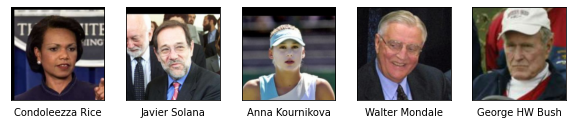

In [36]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), thirdQuarterPersonDf)

In [37]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/ThirdQuarter/FullPhoto/Training.pkl")
newValidationDf.to_pickle("../Data/ThirdQuarter/FullPhoto/Validation.pkl")
newTestDf.to_pickle("../Data/ThirdQuarter/FullPhoto/Test.pkl")

In [38]:
#FaceOnly training data is being read from md5 file
trainingDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Training.pkl")
trainingDf

,PersonID,ImageBGR,DetectionType
0,22,"[[[71, 116, 99], [69, 116, 98], [67, 115, 98],...",SingleFace
1,125,"[[[10, 24, 36], [12, 26, 38], [18, 32, 44], [2...",NoFace
2,356,"[[[177, 199, 204], [176, 199, 204], [175, 200,...",SingleFace
3,277,"[[[91, 103, 121], [91, 104, 122], [92, 105, 12...",SingleFace
4,131,"[[[42, 65, 81], [38, 61, 77], [30, 53, 68], [2...",SingleFace
...,...,...,...
4151,4,"[[[64, 89, 93], [62, 88, 92], [60, 86, 90], [5...",SingleFace
4152,120,"[[[114, 93, 71], [116, 96, 74], [122, 101, 79]...",SingleFace
4153,322,"[[[197, 207, 207], [196, 208, 210], [195, 207,...",NoFace
4154,383,"[[[7, 5, 5], [7, 5, 5], [8, 5, 5], [8, 6, 6], ...",SingleFace


In [39]:
#FaceOnly validation data is being read from md5 file
validationDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Validation.pkl")
validationDf

,PersonID,ImageBGR,DetectionType
0,171,"[[[64, 65, 56], [93, 94, 85], [143, 144, 135],...",SingleFace
1,120,"[[[102, 116, 110], [106, 120, 114], [115, 129,...",SingleFace
2,196,"[[[23, 40, 43], [23, 40, 43], [24, 41, 44], [2...",SingleFace
3,95,"[[[34, 55, 63], [35, 56, 65], [38, 59, 69], [4...",MultipleFace
4,380,"[[[227, 227, 227], [227, 227, 227], [227, 227,...",SingleFace
...,...,...,...
909,71,"[[[104, 116, 120], [103, 116, 121], [102, 117,...",SingleFace
910,183,"[[[35, 17, 10], [35, 17, 11], [36, 17, 12], [3...",SingleFace
911,120,"[[[109, 141, 160], [105, 137, 156], [97, 129, ...",SingleFace
912,120,"[[[84, 94, 111], [81, 91, 108], [76, 86, 103],...",SingleFace


In [40]:
#FaceOnly test data is being read from md5 file
testDf = pd.read_pickle("../Data/ResizedData/FaceOnly/Test.pkl")
testDf

,PersonID,ImageBGR,DetectionType
0,270,"[[[0, 2, 13], [0, 1, 11], [0, 0, 8], [0, 0, 7]...",SingleFace
1,80,"[[[9, 11, 22], [9, 11, 23], [10, 12, 25], [11,...",SingleFace
2,14,"[[[43, 69, 53], [32, 58, 42], [13, 37, 22], [6...",SingleFace
3,120,"[[[161, 124, 104], [160, 124, 105], [159, 125,...",SingleFace
4,401,"[[[8, 15, 142], [7, 15, 142], [6, 15, 142], [6...",SingleFace
...,...,...,...
910,291,"[[[157, 175, 176], [152, 170, 173], [143, 161,...",SingleFace
911,302,"[[[76, 82, 89], [76, 82, 89], [77, 82, 90], [7...",MultipleFace
912,401,"[[[39, 42, 46], [38, 41, 45], [37, 40, 44], [3...",SingleFace
913,340,"[[[11, 16, 25], [11, 16, 24], [12, 15, 23], [1...",SingleFace


In [41]:
#A new training dataframe is being created by getting the images of people whose 
#in firstQuarterPersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newTrainingDf.reset_index(drop = True, inplace = True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,356,"[[[177, 199, 204], [176, 199, 204], [175, 200,...",SingleFace
1,247,"[[[113, 123, 100], [113, 123, 100], [112, 122,...",SingleFace
2,354,"[[[50, 80, 91], [50, 80, 91], [49, 79, 90], [4...",SingleFace
3,34,"[[[122, 123, 114], [124, 125, 116], [128, 129,...",SingleFace
4,381,"[[[90, 109, 124], [92, 110, 126], [95, 113, 13...",SingleFace
...,...,...,...
443,223,"[[[35, 53, 46], [35, 53, 46], [36, 54, 46], [3...",SingleFace
444,292,"[[[147, 152, 153], [147, 151, 152], [148, 151,...",SingleFace
445,221,"[[[68, 70, 64], [65, 68, 62], [60, 63, 58], [5...",SingleFace
446,91,"[[[37, 32, 31], [41, 35, 31], [48, 39, 31], [5...",SingleFace


In [42]:
#PersonID column in newTrainingDf is being replaced with ID column in firstQuarterPersonDf
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,95,"[[[177, 199, 204], [176, 199, 204], [175, 200,...",SingleFace
1,63,"[[[113, 123, 100], [113, 123, 100], [112, 122,...",SingleFace
2,94,"[[[50, 80, 91], [50, 80, 91], [49, 79, 90], [4...",SingleFace
3,10,"[[[122, 123, 114], [124, 125, 116], [128, 129,...",SingleFace
4,101,"[[[90, 109, 124], [92, 110, 126], [95, 113, 13...",SingleFace
...,...,...,...
443,55,"[[[35, 53, 46], [35, 53, 46], [36, 54, 46], [3...",SingleFace
444,79,"[[[147, 152, 153], [147, 151, 152], [148, 151,...",SingleFace
445,54,"[[[68, 70, 64], [65, 68, 62], [60, 63, 58], [5...",SingleFace
446,29,"[[[37, 32, 31], [41, 35, 31], [48, 39, 31], [5...",SingleFace


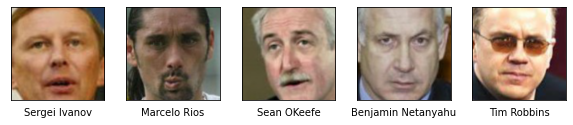

In [43]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), firstQuarterPersonDf)

In [44]:
#A new validation dataframe is being created by getting the images of people
#whose in firstQuarterPersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newValidationDf.reset_index(drop = True, inplace = True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,196,"[[[23, 40, 43], [23, 40, 43], [24, 41, 44], [2...",SingleFace
1,271,"[[[48, 51, 56], [48, 51, 56], [47, 50, 55], [4...",SingleFace
2,118,"[[[188, 227, 255], [188, 227, 255], [188, 226,...",SingleFace
3,85,"[[[172, 178, 173], [162, 167, 162], [143, 146,...",SingleFace
4,68,"[[[23, 36, 38], [22, 35, 37], [20, 33, 33], [1...",SingleFace
5,282,"[[[4, 25, 3], [4, 25, 3], [4, 25, 3], [4, 25, ...",SingleFace
6,298,"[[[217, 220, 228], [216, 219, 227], [214, 217,...",SingleFace
7,224,"[[[106, 197, 204], [106, 197, 204], [105, 196,...",SingleFace
8,415,"[[[38, 66, 97], [37, 65, 96], [36, 64, 95], [3...",SingleFace
9,256,"[[[247, 254, 251], [246, 253, 250], [245, 252,...",SingleFace


In [45]:
#PersonID column in newValidationDf is being replaced with ID column in firstQuarterPersonDf
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,50,"[[[23, 40, 43], [23, 40, 43], [24, 41, 44], [2...",SingleFace
1,73,"[[[48, 51, 56], [48, 51, 56], [47, 50, 55], [4...",SingleFace
2,40,"[[[188, 227, 255], [188, 227, 255], [188, 226,...",SingleFace
3,27,"[[[172, 178, 173], [162, 167, 162], [143, 146,...",SingleFace
4,18,"[[[23, 36, 38], [22, 35, 37], [20, 33, 33], [1...",SingleFace
5,75,"[[[4, 25, 3], [4, 25, 3], [4, 25, 3], [4, 25, ...",SingleFace
6,81,"[[[217, 220, 228], [216, 219, 227], [214, 217,...",SingleFace
7,56,"[[[106, 197, 204], [106, 197, 204], [105, 196,...",SingleFace
8,111,"[[[38, 66, 97], [37, 65, 96], [36, 64, 95], [3...",SingleFace
9,68,"[[[247, 254, 251], [246, 253, 250], [245, 252,...",SingleFace


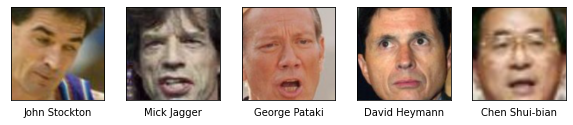

In [46]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), firstQuarterPersonDf)

In [47]:
#A new test dataframe is being created by getting the images of people 
#whose in firstQuarterPersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(firstQuarterPersonDf.OldID)].reset_index(drop = True)
newTestDf.reset_index(drop = True, inplace = True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,270,"[[[0, 2, 13], [0, 1, 11], [0, 0, 8], [0, 0, 7]...",SingleFace
1,111,"[[[78, 85, 88], [77, 84, 87], [74, 83, 84], [7...",SingleFace
2,72,"[[[100, 19, 11], [100, 19, 11], [100, 19, 11],...",SingleFace
3,398,"[[[80, 59, 114], [80, 59, 114], [81, 59, 113],...",MultipleFace
4,252,"[[[144, 177, 226], [147, 180, 228], [153, 186,...",SingleFace
5,333,"[[[65, 82, 103], [67, 85, 107], [73, 91, 116],...",SingleFace
6,365,"[[[63, 34, 29], [63, 35, 30], [62, 36, 33], [6...",SingleFace
7,317,"[[[84, 81, 83], [86, 81, 82], [88, 82, 83], [8...",NoFace
8,400,"[[[2, 4, 112], [2, 4, 112], [2, 4, 112], [2, 4...",SingleFace
9,255,"[[[89, 100, 98], [82, 93, 91], [68, 79, 77], [...",SingleFace


In [48]:
#PersonID column in newTestDf is being replaced with ID column in firstQuarterPersonDf 
#based on OldID column in firstQuarterPersonDf 
#firstQuarterPersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(firstQuarterPersonDf.OldID.values, firstQuarterPersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,72,"[[[0, 2, 13], [0, 1, 11], [0, 0, 8], [0, 0, 7]...",SingleFace
1,37,"[[[78, 85, 88], [77, 84, 87], [74, 83, 84], [7...",SingleFace
2,21,"[[[100, 19, 11], [100, 19, 11], [100, 19, 11],...",SingleFace
3,104,"[[[80, 59, 114], [80, 59, 114], [81, 59, 113],...",MultipleFace
4,65,"[[[144, 177, 226], [147, 180, 228], [153, 186,...",SingleFace
5,88,"[[[65, 82, 103], [67, 85, 107], [73, 91, 116],...",SingleFace
6,97,"[[[63, 34, 29], [63, 35, 30], [62, 36, 33], [6...",SingleFace
7,87,"[[[84, 81, 83], [86, 81, 82], [88, 82, 83], [8...",NoFace
8,105,"[[[2, 4, 112], [2, 4, 112], [2, 4, 112], [2, 4...",SingleFace
9,67,"[[[89, 100, 98], [82, 93, 91], [68, 79, 77], [...",SingleFace


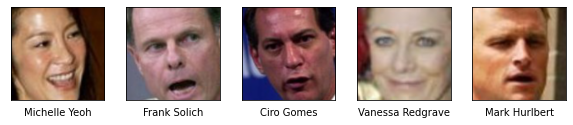

In [49]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), firstQuarterPersonDf)

In [50]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/FirstQuarter/FaceOnly/Training.pkl")
newValidationDf.to_pickle("../Data/FirstQuarter/FaceOnly/Validation.pkl")
newTestDf.to_pickle("../Data/FirstQuarter/FaceOnly/Test.pkl")

In [51]:
#A new training dataframe is being created by getting the images of people whose 
#in thirdQuarterPersonDf from the data in trainingDf
#index of newTrainingDf is being resetted
newTrainingDf = trainingDf[trainingDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newTrainingDf.reset_index(drop = True, inplace = True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,22,"[[[71, 116, 99], [69, 116, 98], [67, 115, 98],...",SingleFace
1,161,"[[[28, 64, 102], [29, 65, 102], [33, 66, 102],...",SingleFace
2,306,"[[[97, 85, 85], [96, 83, 83], [93, 80, 80], [9...",SingleFace
3,406,"[[[179, 108, 98], [180, 107, 98], [181, 107, 9...",SingleFace
4,386,"[[[18, 32, 44], [18, 32, 44], [17, 33, 45], [1...",SingleFace
...,...,...,...
407,326,"[[[142, 177, 187], [141, 175, 184], [140, 170,...",SingleFace
408,27,"[[[22, 43, 58], [19, 41, 57], [13, 37, 56], [1...",SingleFace
409,281,"[[[126, 111, 18], [126, 111, 18], [127, 111, 1...",SingleFace
410,150,"[[[243, 246, 244], [237, 240, 238], [226, 229,...",SingleFace


In [52]:
#PersonID column in newTrainingDf is being replaced with ID column in thirdQuarterPersonDf
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newTrainingDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newTrainingDf

,PersonID,ImageBGR,DetectionType
0,1,"[[[71, 116, 99], [69, 116, 98], [67, 115, 98],...",SingleFace
1,18,"[[[28, 64, 102], [29, 65, 102], [33, 66, 102],...",SingleFace
2,38,"[[[97, 85, 85], [96, 83, 83], [93, 80, 80], [9...",SingleFace
3,50,"[[[179, 108, 98], [180, 107, 98], [181, 107, 9...",SingleFace
4,48,"[[[18, 32, 44], [18, 32, 44], [17, 33, 45], [1...",SingleFace
...,...,...,...
407,41,"[[[142, 177, 187], [141, 175, 184], [140, 170,...",SingleFace
408,3,"[[[22, 43, 58], [19, 41, 57], [13, 37, 56], [1...",SingleFace
409,34,"[[[126, 111, 18], [126, 111, 18], [127, 111, 1...",SingleFace
410,14,"[[[243, 246, 244], [237, 240, 238], [226, 229,...",SingleFace


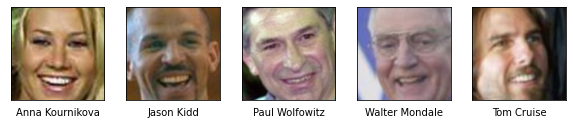

In [53]:
#First 5 images of newTrainingDf are being drawn
DrawImage(newTrainingDf.head(), thirdQuarterPersonDf)

In [54]:
#A new validation dataframe is being created by getting the images of people
#whose in thirdQuarterPersonDf from the data in validationDf
#index of newValidationDf is being resetted
newValidationDf = validationDf[validationDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newValidationDf.reset_index(drop = True, inplace = True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,275,"[[[49, 96, 80], [49, 95, 79], [48, 94, 78], [4...",SingleFace
1,146,"[[[152, 102, 96], [151, 101, 95], [149, 99, 93...",SingleFace
2,164,"[[[14, 31, 50], [13, 31, 50], [13, 30, 51], [1...",SingleFace
3,299,"[[[7, 13, 8], [6, 12, 7], [5, 10, 4], [5, 8, 3...",SingleFace
4,326,"[[[185, 204, 207], [185, 204, 207], [185, 204,...",SingleFace
...,...,...,...
91,220,"[[[0, 7, 2], [0, 7, 3], [1, 7, 5], [3, 8, 8], ...",MultipleFace
92,65,"[[[36, 43, 58], [38, 45, 60], [41, 48, 63], [4...",MultipleFace
93,116,"[[[62, 60, 66], [64, 61, 69], [67, 63, 74], [7...",SingleFace
94,315,"[[[11, 13, 67], [10, 12, 63], [9, 9, 54], [7, ...",SingleFace


In [55]:
#PersonID column in newValidationDf is being replaced with ID column in thirdQuarterPersonDf
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newValidationDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newValidationDf

,PersonID,ImageBGR,DetectionType
0,32,"[[[49, 96, 80], [49, 95, 79], [48, 94, 78], [4...",SingleFace
1,13,"[[[152, 102, 96], [151, 101, 95], [149, 99, 93...",SingleFace
2,20,"[[[14, 31, 50], [13, 31, 50], [13, 30, 51], [1...",SingleFace
3,36,"[[[7, 13, 8], [6, 12, 7], [5, 10, 4], [5, 8, 3...",SingleFace
4,41,"[[[185, 204, 207], [185, 204, 207], [185, 204,...",SingleFace
...,...,...,...
91,28,"[[[0, 7, 2], [0, 7, 3], [1, 7, 5], [3, 8, 8], ...",MultipleFace
92,6,"[[[36, 43, 58], [38, 45, 60], [41, 48, 63], [4...",MultipleFace
93,9,"[[[62, 60, 66], [64, 61, 69], [67, 63, 74], [7...",SingleFace
94,39,"[[[11, 13, 67], [10, 12, 63], [9, 9, 54], [7, ...",SingleFace


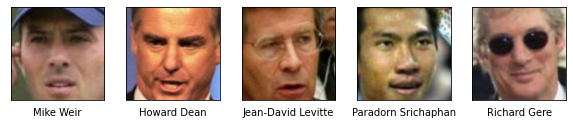

In [56]:
#First 5 images of newValidationDf are being drawn
DrawImage(newValidationDf.head(), thirdQuarterPersonDf)

In [57]:
#A new test dataframe is being created by getting the images of people 
#whose in thirdQuarterPersonDf from the data in testDf
#index of newTestDf is being resetted
newTestDf = testDf[testDf.PersonID.isin(thirdQuarterPersonDf.OldID)].reset_index(drop = True)
newTestDf.reset_index(drop = True, inplace = True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,80,"[[[9, 11, 22], [9, 11, 23], [10, 12, 25], [11,...",SingleFace
1,162,"[[[169, 185, 232], [162, 177, 224], [146, 161,...",SingleFace
2,22,"[[[14, 16, 26], [16, 18, 28], [21, 24, 32], [2...",SingleFace
3,406,"[[[169, 165, 171], [169, 165, 171], [170, 166,...",SingleFace
4,116,"[[[25, 25, 125], [26, 26, 127], [29, 29, 131],...",SingleFace
...,...,...,...
76,215,"[[[14, 16, 10], [14, 16, 10], [13, 15, 9], [13...",SingleFace
77,237,"[[[4, 48, 101], [4, 48, 102], [3, 48, 104], [2...",SingleFace
78,278,"[[[9, 11, 11], [9, 11, 11], [9, 11, 11], [9, 1...",SingleFace
79,291,"[[[157, 175, 176], [152, 170, 173], [143, 161,...",SingleFace


In [58]:
#PersonID column in newTestDf is being replaced with ID column in thirdQuarterPersonDf 
#based on OldID column in thirdQuarterPersonDf 
#thirdQuarterPersonDf.index contains new IDs for each person
newTestDf.PersonID.replace(thirdQuarterPersonDf.OldID.values, thirdQuarterPersonDf.index.values, inplace=True)
newTestDf

,PersonID,ImageBGR,DetectionType
0,7,"[[[9, 11, 22], [9, 11, 23], [10, 12, 25], [11,...",SingleFace
1,19,"[[[169, 185, 232], [162, 177, 224], [146, 161,...",SingleFace
2,1,"[[[14, 16, 26], [16, 18, 28], [21, 24, 32], [2...",SingleFace
3,50,"[[[169, 165, 171], [169, 165, 171], [170, 166,...",SingleFace
4,9,"[[[25, 25, 125], [26, 26, 127], [29, 29, 131],...",SingleFace
...,...,...,...
76,27,"[[[14, 16, 10], [14, 16, 10], [13, 15, 9], [13...",SingleFace
77,29,"[[[4, 48, 101], [4, 48, 102], [3, 48, 104], [2...",SingleFace
78,33,"[[[9, 11, 11], [9, 11, 11], [9, 11, 11], [9, 1...",SingleFace
79,35,"[[[157, 175, 176], [152, 170, 173], [143, 161,...",SingleFace


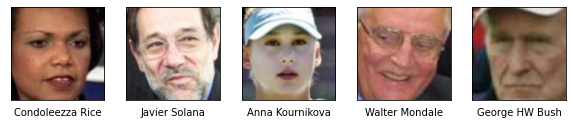

In [59]:
#First 5 images of newTestDf are being drawn
DrawImage(newTestDf.head(), thirdQuarterPersonDf)

In [60]:
#Reorganized data is being saved as pkl file for future use
newTrainingDf.to_pickle("../Data/ThirdQuarter/FaceOnly/Training.pkl")
newValidationDf.to_pickle("../Data/ThirdQuarter/FaceOnly/Validation.pkl")
newTestDf.to_pickle("../Data/ThirdQuarter/FaceOnly/Test.pkl")

In [61]:
#OldID column is being deleted from firstQuarterPersonDf
firstQuarterPersonDf = firstQuarterPersonDf.drop(columns=['OldID'])
firstQuarterPersonDf

,Name
ID,
0,Ahmed Chalabi
1,Ai Sugiyama
2,Alan Greenspan
3,Alastair Campbell
4,Allyson Felix
...,...
107,Wayne Ferreira
108,William Macy
109,Woody Allen


In [62]:
#OldID column is being deleted from thirdQuarterPersonDf
thirdQuarterPersonDf = thirdQuarterPersonDf.drop(columns=['OldID'])
thirdQuarterPersonDf

,Name
ID,
0,Adrien Brody
1,Anna Kournikova
2,Ann Veneman
3,Ari Fleischer
4,Bill McBride
5,Catherine Zeta-Jones
6,Charles Moose
7,Condoleezza Rice
8,Edmund Stoiber


In [63]:
#Reorganized person data is being saved as pkl file for future use
firstQuarterPersonDf.to_pickle("../Data/FirstQuarter/Person.pkl")
thirdQuarterPersonDf.to_pickle("../Data/ThirdQuarter/Person.pkl")